In [2]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
sys.path = list(np.insert(sys.path, 0, "../../../pyvista"))


#sys.path("../../../pyvista")

import pyvista

In [3]:
pyvista.__path__

['../../../pyvista/pyvista']

In [4]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data(extent=[0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = path_to_data + "model5_orientations.csv",
                        path_i = path_to_data + "model5_surface_points.csv") 

Active grids: ['regular']


In [5]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


isFault  isFinite
Fault_Series     True     False
Strat_Series    False     False
Basement        False     False

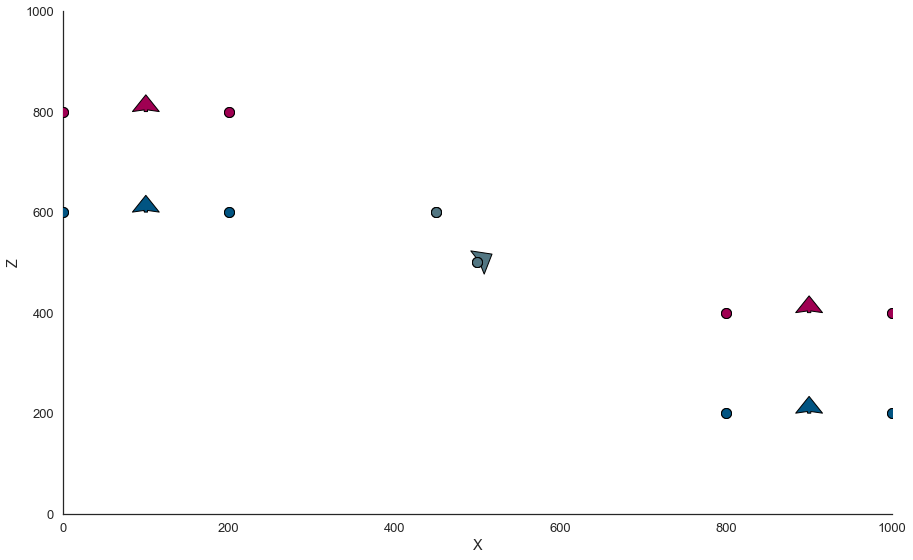

In [6]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

In [7]:
geo_data.orientations

X    Y    Z     X_r     Y_r     Z_r           G_x           G_y  G_z  dip  azimuth  polarity surface        series  id  order_series  smooth
4  500  500  500  0.5001  0.5001  0.5001  8.660254e-01  1.000053e-12  0.5   60       90         1   fault  Fault_Series   1             1    0.01
1  100  500  600  0.3001  0.5001  0.5501  1.000000e-12  1.000000e-12  1.0    0       90         1   rock1  Strat_Series   2             2    0.01
3  900  500  200  0.7001  0.5001  0.3501  1.000000e-12  1.000000e-12  1.0    0       90         1   rock1  Strat_Series   2             2    0.01
0  100  500  800  0.3001  0.5001  0.6501  1.000000e-12  1.000000e-12  1.0    0       90         1   rock2  Strat_Series   3             2    0.01
2  900  500  400  0.7001  0.5001  0.4501  1.000000e-12  1.000000e-12  1.0    0       90         1   rock2  Strat_Series   3             2    0.01

In [8]:
geo_data.surfaces

surface        series  order_surfaces  isBasement    color vertices edges  id
2     fault  Fault_Series               1       False  #527682      NaN   NaN   1
0     rock1  Strat_Series               1       False  #015482      NaN   NaN   2
1     rock2  Strat_Series               2       False  #9f0052      NaN   NaN   3
3  basement      Basement               1        True  #728f02      NaN   NaN   4

In [9]:
geo_data.orientations.sort_table()

X    Y    Z     X_r     Y_r     Z_r           G_x           G_y  G_z  \
4  500  500  500  0.5001  0.5001  0.5001  8.660254e-01  1.000053e-12  0.5   
1  100  500  600  0.3001  0.5001  0.5501  1.000000e-12  1.000000e-12  1.0   
3  900  500  200  0.7001  0.5001  0.3501  1.000000e-12  1.000000e-12  1.0   
0  100  500  800  0.3001  0.5001  0.6501  1.000000e-12  1.000000e-12  1.0   
2  900  500  400  0.7001  0.5001  0.4501  1.000000e-12  1.000000e-12  1.0   

   dip  azimuth  polarity surface        series  id  order_series  smooth  
4   60       90         1   fault  Fault_Series   1             1    0.01  
1    0       90         1   rock1  Strat_Series   2             2    0.01  
3    0       90         1   rock1  Strat_Series   2             2    0.01  
0    0       90         1   rock2  Strat_Series   3             2    0.01  
2    0       90         1   rock2  Strat_Series   3             2    0.01

In [10]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_compile')

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!


In [11]:
sol = gp.compute_model(geo_data)

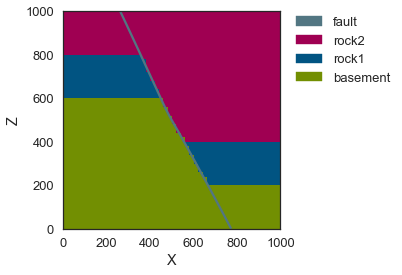

In [12]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=False, show_all_data=True)

## Pyvista

In [13]:
import pyvista as pv
import numpy as np

In [14]:
g = geo_data.grid.values
g

array([[ 10.,  10.,  10.],
       [ 10.,  10.,  30.],
       [ 10.,  10.,  50.],
       ...,
       [990., 990., 950.],
       [990., 990., 970.],
       [990., 990., 990.]])

In [15]:
g_3D = g.reshape(*geo_data.grid.regular_grid.resolution, 3).T
g_3D.shape

(3, 50, 50, 50)

In [16]:
vista_grid = pv.StructuredGrid(g_3D[0], g_3D[1], g_3D[2])
vista_grid = pv.StructuredGrid(*g_3D)

In [17]:
vista_grid

StructuredGrid (0x7fdd80b963a8)
  N Cells:	117649
  N Points:	125000
  X Bounds:	1.000e+01, 9.900e+02
  Y Bounds:	1.000e+01, 9.900e+02
  Z Bounds:	1.000e+01, 9.900e+02
  N Arrays:	0

In [18]:
vista_grid.plot(use_panel=True)

VTK(vtkCocoaRenderWindow, height=400, sizing_mode='stretch_width')

In [19]:
d = {'lith': geo_data.solutions.lith_block}

for i in d:
    print(i)

lith


In [20]:
vista_grid.point_arrays['lith'] = geo_data.solutions.lith_block

Colors:

In [27]:
import matplotlib.colors as mcolors

cmap=mcolors.ListedColormap(list(geo_data.surfaces.df.iloc[:, 4]))
norm = mcolors.Normalize(vmin=0.5, vmax=len(cmap.colors) + 0.5)

Plot:

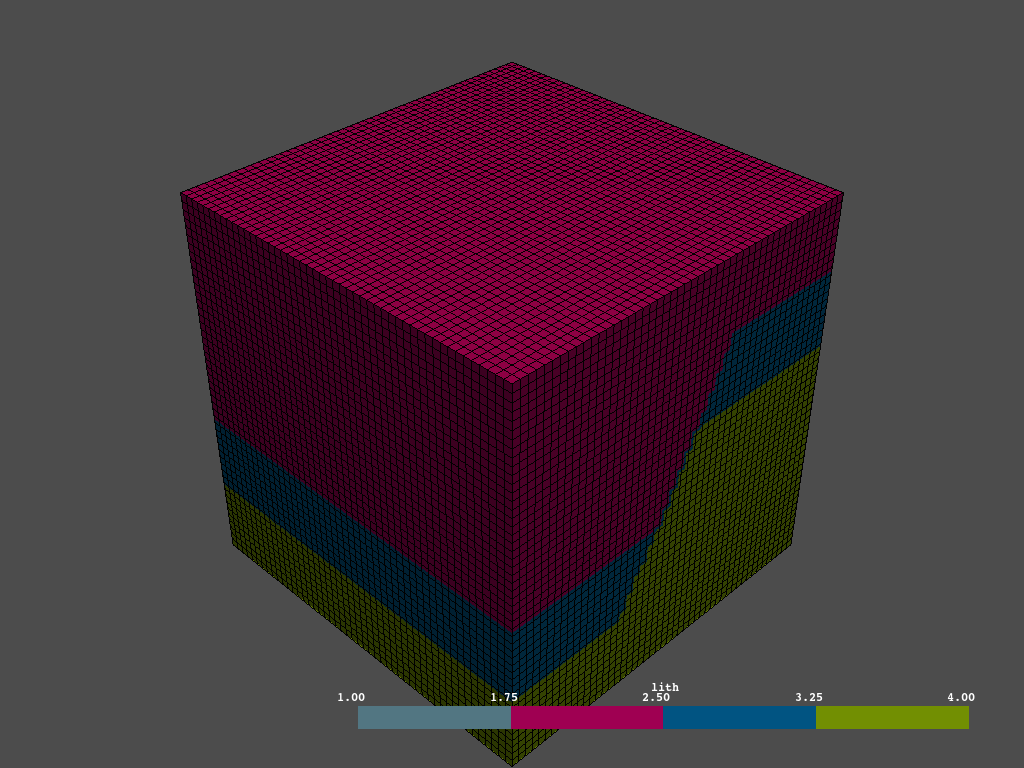

In [31]:
vista_grid.plot(sclars='lith', show_edges=True, cmap = cmap, norm=norm, use_panel=False, clim=[1,4])

### Plot data:

In [22]:
from importlib import reload
reload(pv)

<module 'pyvista' from '../../../pyvista/pyvista/__init__.py'>

In [26]:
p = pv.Plotter(notebook=False,)
if True:
    def foo(a, b):
        print(a,b, b.WIDGET_INDEX)
        return None
    
    k = p.add_sphere_widget(foo, center=(2,2,2))
    k.WIDGET_INDEX=55

(2.0, 2.0, 2.0) vtkSphereWidget (0x7fe8244b9410)
  Debug: Off
  Modified Time: 31181
  Reference Count: 1
  Registered Events: 
    Registered Observers:
      vtkObserver (0x7fe8244e0360)
        Event: 43
        EventName: EndInteractionEvent
        Command: 0x7fe8244e02e0
        Priority: 0
        Tag: 1
  Current Renderer: 0x7fe8244af5a0
  Default Renderer: 0x0
  Enabled: 1
  Priority: 0.5
  Interactor: 0x7fe8244b8c10
  Key Press Activation: On
  Key Press Activation Value: i
  Prop3D: 0x0
  Input: 0x0
  Handle Size: 0.01
  Place Factor: 0.5
  Sphere Representation: Surface
  Sphere Property: 0x7fe8244df2b0
  Selected Sphere Property: 0x7fe8244df6b0
  Handle Property: 0x7fe8244df9c0
  Selected Handle Property: 0x7fe8244dfd40
  Translation: On
  Scale: On
  Handle Visibility: Off
  Handle Direction: (1, 0, 0)
  Handle Position: (0.25, 0, 0)
  Theta Resolution: 30
  Phi Resolution: 30
  Center: (2, 2, 2)
  Radius: 0.5

 0


In [55]:
p.bound= geo_data.grid.regular_grid.extent


In [42]:
surf1 = pv.PolyData(geo_data.solutions.vertices[0])
ss = surf1.delaunay_2d()
p.add_mesh(ss)

(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f7f321dc768

In [44]:

_e = geo_data.grid.regular_grid.extent
_e_dx = _e[1] - _e[0]
_e_dy = _e[3] - _e[2]
_e_dz = _e[5] - _e[4]
_e_d_avrg = (_e_dx + _e_dy + _e_dz) / 3

r_ = _e_d_avrg * .03

In [45]:
def foo(a):
    return None

def foo2(a, b):
    return None

if True:
    for e, val in geo_data.surface_points.df.iterrows():

        #print(val)
        #c = mcolors.hex2color(geo_data.surfaces.df.set_index('id')['color'][1])
        c = geo_data.surfaces.df.set_index('id')['color'][val['id']]
        a = p.add_sphere_widget(foo, center=val[['X', 'Y', 'Z']], color=c, radius=r_)

if True:
    for e, val in geo_data.orientations.df.iterrows():

        #print(val)
        #c = mcolors.hex2color(geo_data.surfaces.df.set_index('id')['color'][1])
        c = geo_data.surfaces.df.set_index('id')['color'][val['id']]
        p.add_plane_widget_simple(foo2, normal=val[['G_x', 'G_y', 'G_z']], 
                                  origin=val[['X', 'Y', 'Z']], color=c,
                                  bounds =  geo_data.grid.regular_grid.extent, factor=.1)

In [56]:
p.show_grid()


In [57]:
p.show()

[(2.4922833344699735, -2.2003455406754284, 5.807892300411518),
 (0.0, 0.0, 0.0),
 (-0.9278123489777671, -0.1101173652075488, 0.35642448143204986)]

### Plot surface:

In [27]:
geo_data.solutions.vertices[0],  geo_data.solutions.edges[0]

(array([[254.15592194,  20.        , 980.        ],
        [260.        ,   0.        , 967.25738525],
        [253.94594193,   0.        , 980.        ],
        ...,
        [751.14402771, 960.        ,   0.        ],
        [740.12840271, 980.        ,  20.        ],
        [750.75836182, 980.        ,   0.        ]]),
 array([[   2,    1,    0],
        [   0,    1,    3],
        [   0,    3,    4],
        ...,
        [3767, 3769, 3768],
        [3768, 3669, 3667],
        [3768, 3667, 3766]], dtype=int32))

#### This crash the kernel:

In [30]:
tri = geo_data.solutions.edges[0]



In [47]:
surf = pv.PolyData(geo_data.solutions.vertices[0], np.insert(tri, 0, 3, axis=1).ravel())
#surf.plot()

In [49]:
p.add_mesh(surf)

(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f7f321dc9a8

In [51]:
mesh = Out[49]



In [39]:
surf.color

AttributeError: 'PolyData' object has no attribute 'color'

In [33]:
surf.points /=10

In [36]:
surf.faces

array([   3,    2,    1, ..., 3768, 3667, 3766])

In [50]:
surf.points = geo_data.solutions.vertices[1]
surf.faces =  np.insert(geo_data.solutions.edges[1], 0, 3, axis=1).ravel()

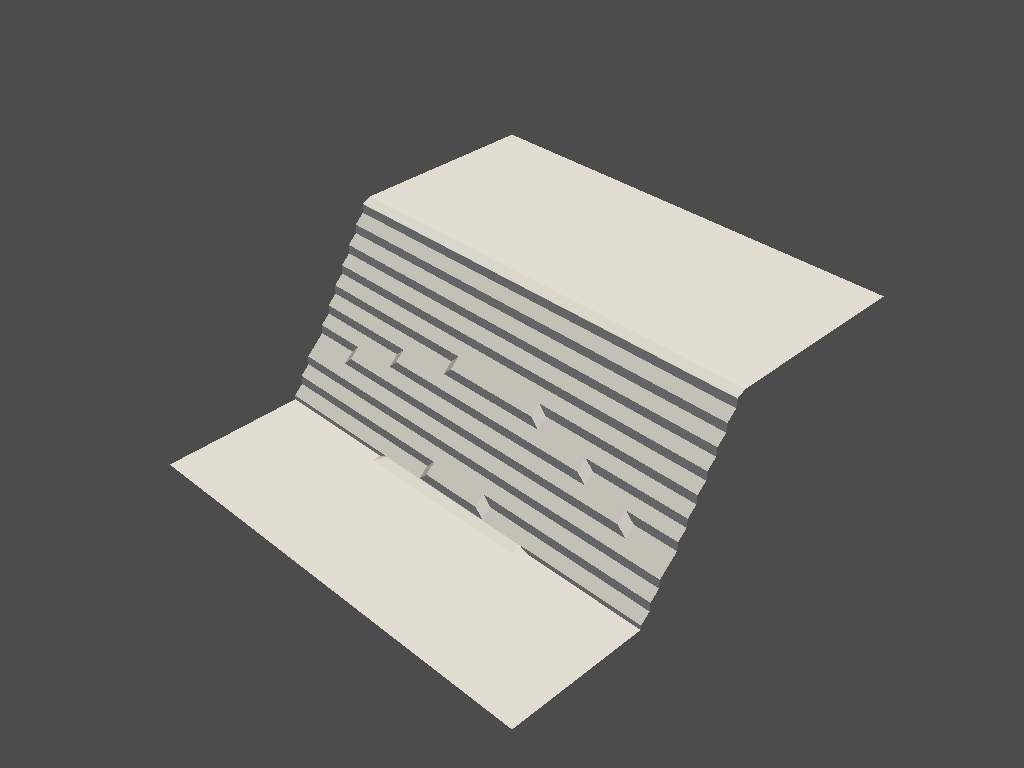

In [38]:
surf.plot()

### Background Plotter

In [30]:
#p = pv.BackgroundPlotter()

In [31]:
#p.add_mesh(vista_grid, sclars='lith', show_edges=True, cmap = cmap)

In [32]:
#p.add_mesh(surf)

### Testing stuff

In [33]:
import pyvista as pv
import numpy as np

In [34]:
n = 20
x = np.linspace(-200, 200, num=n) + np.random.uniform(-5, 5, size=n)
y = np.linspace(-200, 200, num=n) + np.random.uniform(-5, 5, size=n)
xx, yy = np.meshgrid(x, y)
A, b = 100, 100
zz = A * np.exp(-0.5 * ((xx / b) ** 2.0 + (yy / b) ** 2.0))

# Get the points as a 2D NumPy array (N by 3)
points = np.c_[xx.reshape(-1), yy.reshape(-1), zz.reshape(-1)]
print(points[0:5, :])

[[-199.38361984 -204.53643581    1.6916783 ]
 [-180.350852   -204.53643581    2.42805619]
 [-154.01790076 -204.53643581    3.77098718]
 [-140.92074041 -204.53643581    4.57441926]
 [-114.39326773 -204.53643581    6.41809614]]


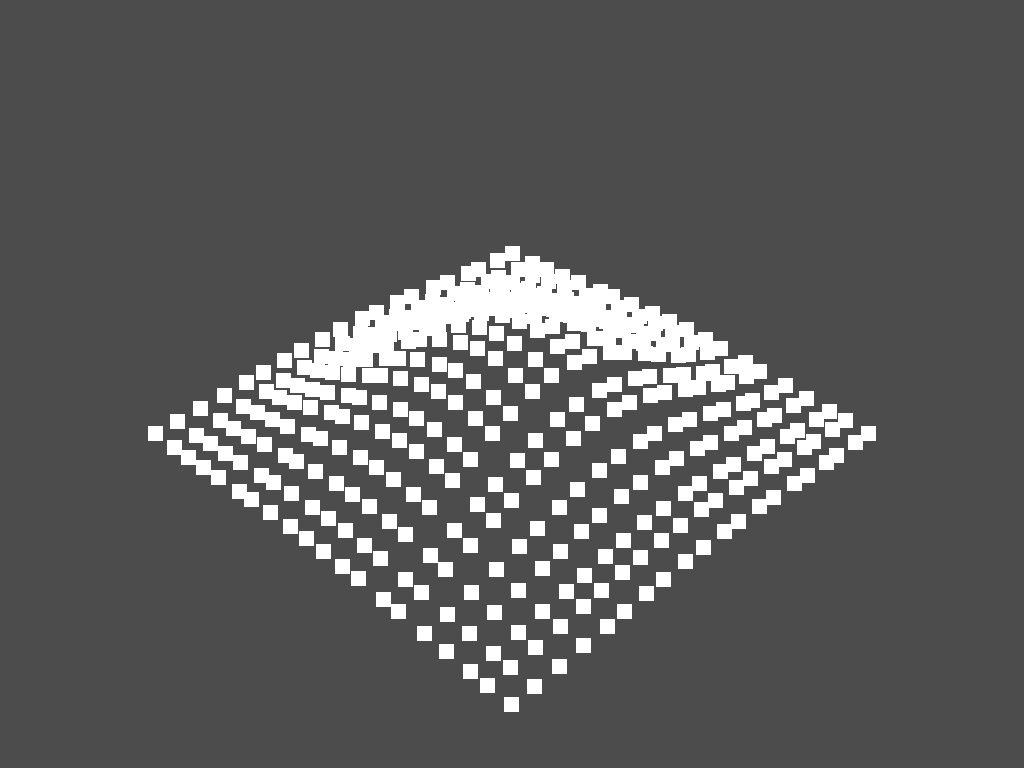

In [35]:
cloud = pv.PolyData(points)
cloud.plot(point_size=15)

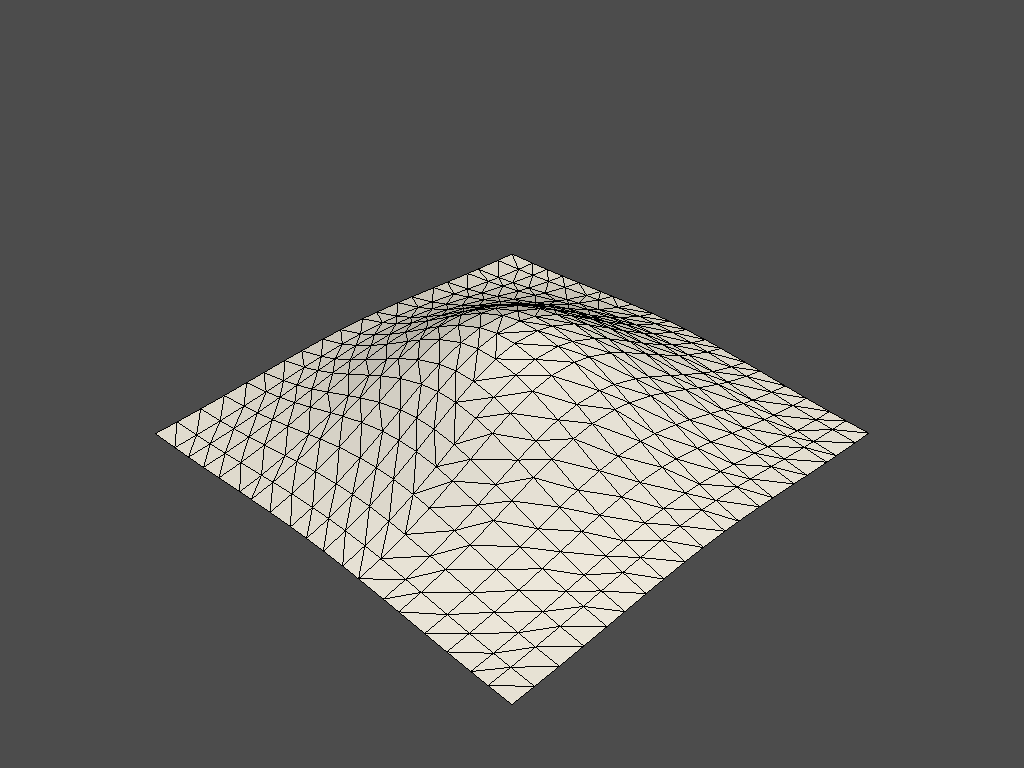

In [36]:
surf = cloud.delaunay_2d()
surf.plot(show_edges=True)


In [37]:
surf.points

pyvista_ndarray([[-199.38361984, -204.53643581,    1.6916783 ],
                 [-180.350852  , -204.53643581,    2.42805619],
                 [-154.01790076, -204.53643581,    3.77098718],
                 ...,
                 [ 160.56605352,  199.14166009,    3.79326555],
                 [ 183.74900651,  199.14166009,    2.54496088],
                 [ 204.52173173,  199.14166009,    1.70036547]])

In [38]:
surf.faces

array([  3,  21,   1, ..., 399, 379, 398])

In [39]:
import pyvista as pv
import numpy as np
# Create a triangle surface
surf = pv.PolyData()
surf.points = np.array([[-10,-10,-10],
                    [10,10,-10],
                    [-10,10,0],])
surf.faces = np.array([3, 0, 1, 2])
p = pv.Plotter(notebook=False)
def callback(point):
    surf.points[0] = point
#p.enable_sphere_widget(callback)

p.add_sphere_widget(callback)
p.add_mesh(surf, color=True)
p.show_grid()
p.show()


[(27.781683096151145, 32.53341726348856, 23.031683096151145),
 (0.0, 4.751734167337418, -4.75),
 (0.0, 0.0, 1.0)]

In [40]:
from scipy.interpolate import griddata
import numpy as np
import pyvista as pv
def get_colors(n):
    """A haleper function to get n colors"""
    from itertools import cycle
    import matplotlib
    cycler = matplotlib.rcParams['axes.prop_cycle']
    colors = cycle(cycler)
    colors = [next(colors)['color'] for i in range(n)]
    return colors
# Create a grid to interpolate to
xmin, xmax, ymin, ymax = 0, 100, 0, 100
x = np.linspace(xmin, xmax, num=25)
y = np.linspace(ymin, ymax, num=25)
xx, yy, zz = np.meshgrid(x, y, [0])
# Make sure boundary conditions exist
boundaries = np.array([[xmin,ymin,0],
                   [xmin,ymax,0],
                   [xmax,ymin,0],
                   [xmax,ymax,0]])
# Create the PyVista mesh to hold this grid
surf = pv.StructuredGrid(xx, yy, zz)
# Create some intial perturbations
# - this array will be updated inplace
points = np.array([[33,25,45],
               [70,80,13],
               [51,57,10],
               [25,69,20]])
# Create an interpolation function to update that surface mesh
def update_surface(point, i):
    points[i] = point
    tp = np.vstack((points, boundaries))
    zz = griddata(tp[:,0:2], tp[:,2], (xx[:,:,0], yy[:,:,0]), method='cubic')
    surf.points[:,-1] = zz.ravel(order='F')
    return
# Get a list of unique colors for each widget
colors = get_colors(len(points))
# Begin the plotting routine
p = pv.Plotter(notebook=False)
# Add the surface to the scene
p.add_mesh(surf, color=True)
# Add the widgets which will update the surface
p.enable_sphere_widget(update_surface, center=points,
                       color=colors, radius=3)
# Add axes grid
p.show_grid()
# Show it!
p.show()

AttributeError: 'Plotter' object has no attribute 'enable_sphere_widget'